In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [151]:
data = np.load("Run20-long.npz", allow_pickle=True)
settings = data['settings'].item()
raw = data['raw'].item()
nu3D = raw['nu3D']
nubar3D = raw['nubar3D']

In [152]:
T = settings['T']
N = settings['N'] + 1
E = np.linspace(0,settings['eps_max'], N) * T
time = raw['time']

In [153]:
def dnue_dE(E, P0, Pz):
    return E**2 / (2 * np.pi**2) * 1/2 * P0 * (1+Pz)
def dnumu_dE(E, P0, Pz):
    return E**2 / (2 * np.pi**2) * 1/2 * P0 * (1-Pz)

In [154]:
def create_c(function, data):
    c = np.zeros((len(data), len(E[1:])))
    for j in range(len(E[1:])):
        initial = function(E[j+1], data[0,j,0], data[0,j,3])
        for i in range(len(data)):
            c[i,j] = function(E[j+1], data[i,j,0], data[i,j,3]) / initial
    return c.T

In [155]:
def one_number_density(t, ddE, data):
    y = np.zeros(len(E[1:]))
    for i in range(len(y)):
        d = ddE(E[i+1], data[t,i,0], data[t,i,3])
        y[i] = d * E[i+1]**2
    
    return 2 / (3 * 1.20206 * T**3) * np.trapz(y,E[1:])

In [156]:
def all_number_densities(ddE, data):
    n = np.zeros(len(time))
    for i in range(len(time)):
        n[i] = one_number_density(i, ddE, data)
    return n

In [157]:
def plot(function, data, title):
    plt.figure(figsize=[4,4.5])
    color = plt.axes([0.1, 0, 1.00, 1.11])
    dens = plt.axes([0.1, 1.11, 1.00, 0.5])

    y = all_number_densities(function, data)
    dens.plot(y)
    dens.set_ylabel("number density/thermal distribution")
    
    c = create_c(function, data)
    color.imshow(c[:,1:],origin='lower',vmin=0.9,vmax=1.1,aspect='auto',extent=(time[0], time[len(time)-1], E[0], E[len(E)-1]))
    color.set_ylabel("Energy")
    
    dens.xaxis.set_major_formatter(plt.NullFormatter())
    color.set_xlabel("Time")
    plt.title(title)
    plt.show()

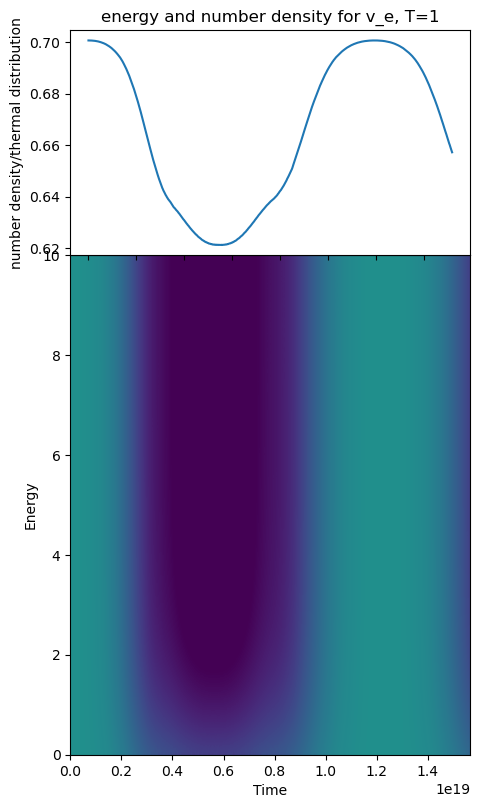

In [149]:
plot(dnue_dE, nu3D, "energy and number density for v_e, T=1")

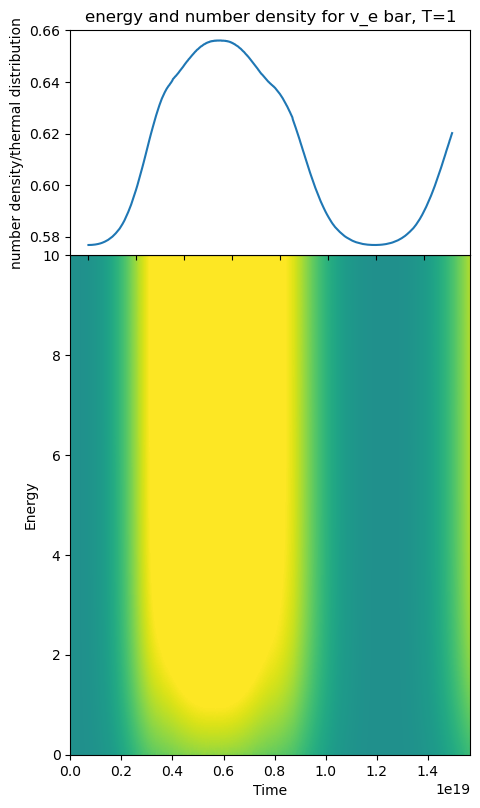

In [150]:
plot(dnue_dE, nubar3D, "energy and number density for v_e bar, T=1")

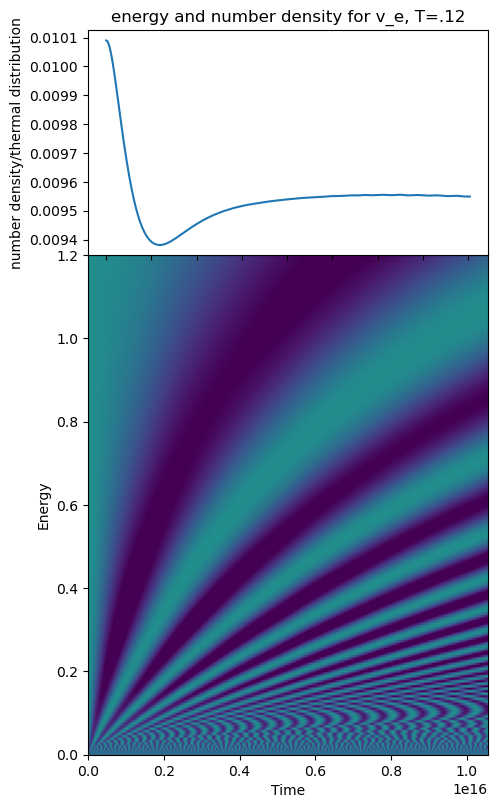

In [159]:
plot(dnue_dE, nu3D, "energy and number density for v_e, T=.12")

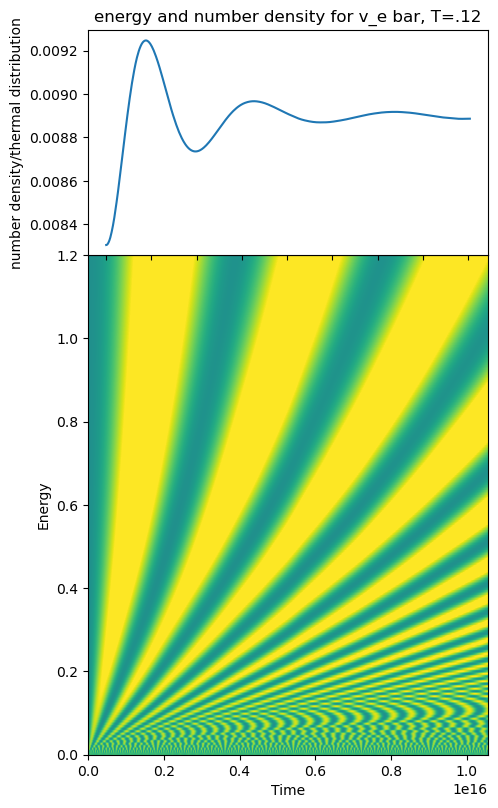

In [160]:
plot(dnue_dE, nubar3D, "energy and number density for v_e bar, T=.12")